In [59]:
import tweepy as tw
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [60]:
Consumer_Key = "OZSPt2YMbHue3XQ4Y9cFRe9rK"
Consumer_Secret_Key = "sivoOWqrW3M1YuLvEUrb2rjlfFluTkpK4PQ4cN96sQnWOl1jTm"
Access_Token = "1316706657552855043-990tzBCPEpyggoOSXxWM3GLekoY1zT"
Access_Token_Secret = "PcNLCwWhiHXpLIg5hYLb3wZea2bAyQfbkyXcVrgwS4zUx"

In [61]:
auth = tw.OAuthHandler(Consumer_Key, Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [62]:
posts = api.user_timeline(screen_name = "realDonaldTrump", count = 100, lang = "en", tweet_mode="extended")
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

Show the 5 recent tweets: 

1) THE BIGGEST WINNER OF OUR NEW DEFENSE BILL IS CHINA!. I WILL VETO!

2) MOST CORRUPT ELECTION IN U.S. HISTORY!

3) How do states and politicians confirm an election where corruption and irregularities are documented throughout? A Swing State hustle!

4) The drug companies are going crazy putting up nasty ads against me asking to “withdraw my Favored Nation’s Executive Order”. They don’t want the U.S. to have the lowest drug prices in the world, but we now will. Big reductions coming. No other politician would do this!!!

5) If failing Governor @BrianKempGA would allow signature verification, David &amp; Kelly would WIN!



In [63]:
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])
df.head()

,Tweets
0,THE BIGGEST WINNER OF OUR NEW DEFENSE BILL IS ...
1,MOST CORRUPT ELECTION IN U.S. HISTORY!
2,How do states and politicians confirm an elect...
3,The drug companies are going crazy putting up ...
4,If failing Governor @BrianKempGA would allow s...


In [64]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,THE BIGGEST WINNER OF OUR NEW DEFENSE BILL IS ...
1,MOST CORRUPT ELECTION IN U.S. HISTORY!
2,How do states and politicians confirm an elect...
3,The drug companies are going crazy putting up ...
4,If failing Governor would allow signature ver...
...,...
95,This was not my case as has been so incorrectl...
96,NASDAQ and S&amp;P close at all-time highs. Co...
97,: Every waking moment is about one purpose: sa...
98,": ""The plan we put forward prioritizes the eld..."


In [65]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,THE BIGGEST WINNER OF OUR NEW DEFENSE BILL IS ...,0.454545,0.213068
1,MOST CORRUPT ELECTION IN U.S. HISTORY!,0.750000,-0.062500
2,How do states and politicians confirm an elect...,0.000000,0.000000
3,The drug companies are going crazy putting up ...,0.655000,-0.135586
4,If failing Governor would allow signature ver...,0.400000,1.000000
...,...,...,...
95,This was not my case as has been so incorrectl...,0.817778,0.187778
96,NASDAQ and S&amp;P close at all-time highs. Co...,0.000000,0.000000
97,: Every waking moment is about one purpose: sa...,0.433333,0.366667
98,": ""The plan we put forward prioritizes the eld...",0.000000,0.000000


In [66]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,THE BIGGEST WINNER OF OUR NEW DEFENSE BILL IS ...,0.454545,0.213068,Positive
1,MOST CORRUPT ELECTION IN U.S. HISTORY!,0.750000,-0.062500,Negative
2,How do states and politicians confirm an elect...,0.000000,0.000000,Neutral
3,The drug companies are going crazy putting up ...,0.655000,-0.135586,Negative
4,If failing Governor would allow signature ver...,0.400000,1.000000,Positive
...,...,...,...,...
95,This was not my case as has been so incorrectl...,0.817778,0.187778,Positive
96,NASDAQ and S&amp;P close at all-time highs. Co...,0.000000,0.000000,Neutral
97,: Every waking moment is about one purpose: sa...,0.433333,0.366667,Positive
98,": ""The plan we put forward prioritizes the eld...",0.000000,0.000000,Neutral


In [67]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) MOST CORRUPT ELECTION IN U.S. HISTORY!

2) The drug companies are going crazy putting up nasty ads against me asking to “withdraw my Favored Nation’s Executive Order”. They don’t want the U.S. to have the lowest drug prices in the world, but we now will. Big reductions coming. No other politician would do this!!!

3) Why didn’t Bill Barr reveal the truth to the public, before the Election, about Hunter Biden. Joe was lying on the debate stage that nothing was wrong, or going on - Press confirmed. Big disadvantage for Republicans at the polls!

4) A big disappointment! 

5) : One of our callers says her dead father got a text message asking him to vote in the Georgia U.S. Senate race. Her dad was…

6) I WON THE ELECTION IN A LANDSLIDE, but remember, I only think in terms of legal votes, not all of the fake voters and fraud that miraculously floated in from everywhere! What a disgrace!

7) : Kayleigh on Supreme Court: Yeah there’s no way to say it other than they dodged. They dodged. 

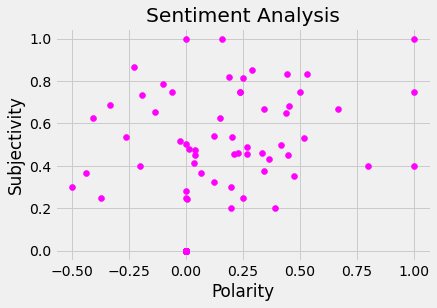

In [77]:
plt.figure(figsize=(6,4))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Magenta')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [69]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

43.0

In [70]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

13.0

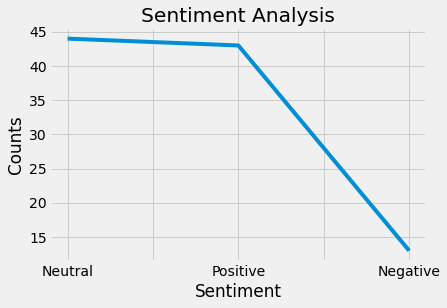

In [75]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()